In [4]:
import os
from pathlib import Path
import IPython.display as ipd

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile


from subprocess import check_output

folders = os.listdir("C:/Users/Aashish Agarwal/PycharmProjects/STT/Input/train/audio")
print(folders)


['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero', '_background_noise_']


In [5]:
train_audio_path = 'C:/Users/Aashish Agarwal/PycharmProjects/STT/Input/train/audio'

train_labels = os.listdir(train_audio_path)
train_labels.remove('_background_noise_')
print(f'Number of labels: {len(train_labels)}')

labels_to_keep = ['yes', 'no', 'up', 'down', 'left',
                  'right', 'on', 'off', 'stop', 'go', 'silence']

train_file_labels = dict()
for label in train_labels:
    files = os.listdir(train_audio_path + '/' + label)
    for f in files:
        train_file_labels[label + '/' + f] = label

train = pd.DataFrame.from_dict(train_file_labels, orient='index')
train = train.reset_index(drop=False)
train = train.rename(columns={'index': 'file', 0: 'folder'})
train = train[['folder', 'file']]
train = train.sort_values('file')
train = train.reset_index(drop=True)
print(train.shape)

def remove_label_from_file(label, fname):
    return fname[len(label)+1:]

train['file'] = train.apply(lambda x: remove_label_from_file(*x), axis=1)
train['label'] = train['folder'].apply(lambda x: x if x in labels_to_keep else 'unknown')

Number of labels: 30
(64721, 2)


In [6]:
sample_rate, samples = wavfile.read(str(train_audio_path) + '/house/61e50f62_nohash_1.wav')
frequencies, times, spectogram = signal.spectrogram(samples, sample_rate)

In [7]:
sample_rate

16000

In [8]:
frequencies

array([   0. ,   62.5,  125. ,  187.5,  250. ,  312.5,  375. ,  437.5,
        500. ,  562.5,  625. ,  687.5,  750. ,  812.5,  875. ,  937.5,
       1000. , 1062.5, 1125. , 1187.5, 1250. , 1312.5, 1375. , 1437.5,
       1500. , 1562.5, 1625. , 1687.5, 1750. , 1812.5, 1875. , 1937.5,
       2000. , 2062.5, 2125. , 2187.5, 2250. , 2312.5, 2375. , 2437.5,
       2500. , 2562.5, 2625. , 2687.5, 2750. , 2812.5, 2875. , 2937.5,
       3000. , 3062.5, 3125. , 3187.5, 3250. , 3312.5, 3375. , 3437.5,
       3500. , 3562.5, 3625. , 3687.5, 3750. , 3812.5, 3875. , 3937.5,
       4000. , 4062.5, 4125. , 4187.5, 4250. , 4312.5, 4375. , 4437.5,
       4500. , 4562.5, 4625. , 4687.5, 4750. , 4812.5, 4875. , 4937.5,
       5000. , 5062.5, 5125. , 5187.5, 5250. , 5312.5, 5375. , 5437.5,
       5500. , 5562.5, 5625. , 5687.5, 5750. , 5812.5, 5875. , 5937.5,
       6000. , 6062.5, 6125. , 6187.5, 6250. , 6312.5, 6375. , 6437.5,
       6500. , 6562.5, 6625. , 6687.5, 6750. , 6812.5, 6875. , 6937.5,
      

In [9]:
times

array([0.008, 0.022, 0.036, 0.05 , 0.064, 0.078, 0.092, 0.106, 0.12 ,
       0.134, 0.148, 0.162, 0.176, 0.19 , 0.204, 0.218, 0.232, 0.246,
       0.26 , 0.274, 0.288, 0.302, 0.316, 0.33 , 0.344, 0.358, 0.372,
       0.386, 0.4  , 0.414, 0.428, 0.442, 0.456, 0.47 , 0.484, 0.498,
       0.512, 0.526, 0.54 , 0.554, 0.568, 0.582, 0.596, 0.61 , 0.624,
       0.638, 0.652, 0.666, 0.68 , 0.694, 0.708, 0.722, 0.736, 0.75 ,
       0.764, 0.778, 0.792, 0.806, 0.82 , 0.834, 0.848, 0.862, 0.876,
       0.89 , 0.904, 0.918, 0.932, 0.946, 0.96 , 0.974, 0.988])

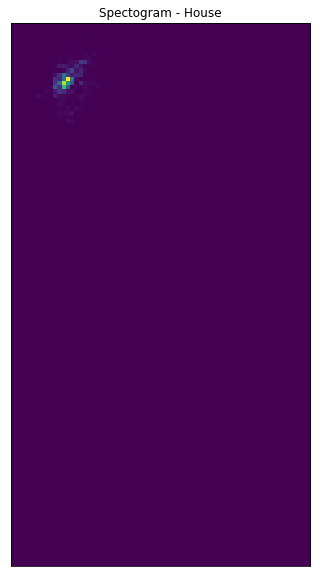

In [10]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Spectogram - House')
ax1.imshow(spectogram)

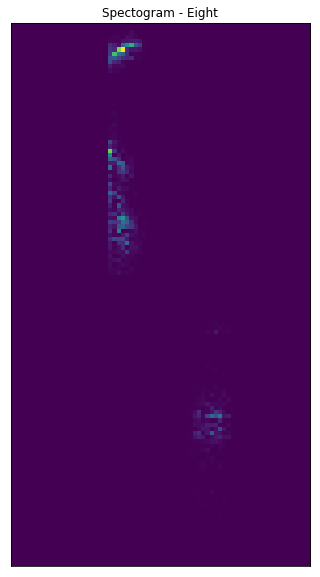

In [11]:
sample_rate, samples = wavfile.read(str(train_audio_path) + '/eight/25132942_nohash_2.wav')
frequencies, times, spectogram = signal.spectrogram(samples, sample_rate)
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Spectogram - Eight')
ax1.imshow(spectogram)

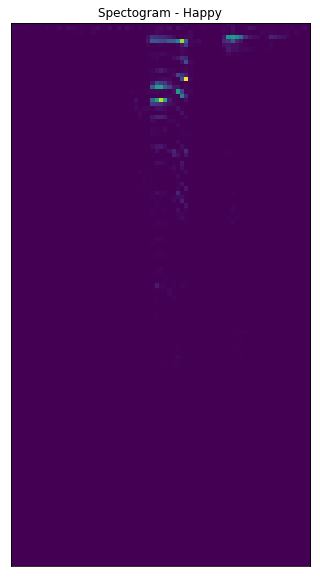

In [12]:
sample_rate, samples = wavfile.read(str(train_audio_path) + '/happy/43f57297_nohash_0.wav')
frequencies, times, spectogram = signal.spectrogram(samples, sample_rate)
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Spectogram - Happy')
ax1.imshow(spectogram)

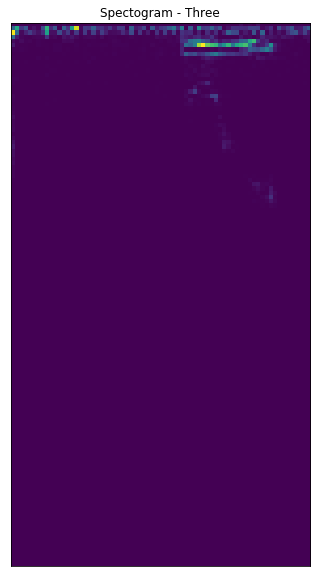

In [13]:
sample_rate, samples = wavfile.read(str(train_audio_path) + '/three/19e246ad_nohash_0.wav')
frequencies, times, spectogram = signal.spectrogram(samples, sample_rate)
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Spectogram - Three')
ax1.imshow(spectogram)